In [1]:
library(AnnotationDbi)
library(org.Hs.eg.db)
library(TxDb.Hsapiens.UCSC.hg38.knownGene)
library(hugene10sttranscriptcluster.db) 
library(hugene10stprobeset.db)
library(illuminaHumanv4.db)
library(readxl)
library(GEOquery)

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: Biobase

Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Loading required package: IRanges

Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The f

In [2]:
data1 <- read.csv("annotated_data.csv")

In [3]:
head(data1, 2)

,X.ID_REF.,X.GSM418770.,X.GSM418771.,X.GSM418772.,X.GSM418773.,X.GSM418774.,X.GSM418775.,X.GSM418776.,X.GSM418777.,X.GSM418778.,⋯,X.GSM418910.,X.GSM418911.,X.GSM418912.,X.GSM418913.,X.GSM418914.,X.GSM418915.,X.GSM418916.,X.GSM418917.,X.GSM418918.,X.GSM418919.
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,CDH4,10.38155652,9.875017655,9.952308835,9.611676002,9.809646055,9.66926302,9.9072691,10.00261746,9.8560336,⋯,10.48814923,10.10638381,10.1963145,10.1461442,10.26667688,10.25561303,10.26937154,10.06204321,10.17315207,10.23274306
2,CDH5,3.987843133,-0.196849218,2.337403823,-0.263549932,0.021779445,4.94440894,2.8352501,2.27463549,4.6598622,⋯,3.384536655,1.1209961,3.614078221,2.41131698,2.464530546,1.194942156,1.843864573,2.717381116,3.018706751,1.540264922


In [14]:
col_names <- colnames(data1)
new_col_names <- gsub("^X\\.|\\.$", "", col_names)
colnames(data1) <- new_col_names

Работа с GSE16717

In [ ]:
file_path1 <- "2nd_array/GSE16717_series_matrix.txt"
file_content1 <- readLines(file_path1)
file_content1 <- paste(file_content1, collapse = " ")
age_list1 <- as.numeric(regmatches(file_content1, gregexpr('age:\s*(\d+)', file_content1))[[1]])
print(age_list)

In [30]:
age_list1 <- regmatches(age_string, gregexpr("age:\\s*(\\d+\\.?\\d*)\\s*years", age_string))[[1]]
age_list1 <- as.numeric(gsub("age: | years", "", age_list1))
print(length(age_list1))
print(age_list1)


ERROR: Error in parse(text = x, srcfile = src): <text>:1:41: unexpected string constant
1: age_string <- "age: 91.53 years"        "age: 56.1 years"
                                            ^


GSE67220

In [16]:
file_path3 <- "3rd_data/GSE67220_series_matrix.txt" 

file_content <- readLines(file_path3)
ages <- c()

for (line in file_content) {
  if (startsWith(line, "!Sample_title")) {
    parts <- strsplit(line, "\t")[[1]]
    for (part in parts[-1]) {
      age <- as.numeric(gsub("[^0-9]", "", part))
      ages <- c(ages, age)
    }
  }
}
print(ages)

 [1] 25 28 31 34 37 40 43 46 49 52 55  1 10 13 16 19 22  4 58  7


In [17]:
file_content <- readLines(file_path3)
table_data <- list()

start_index <- which(file_content == "!series_matrix_table_begin") + 1

end_index <- which(file_content == "!series_matrix_table_end") - 1

table_data <- list()

for (i in start_index:end_index) {
  parts <- strsplit(file_content[i], "\t")[[1]]
  if (i == start_index) {
    col_names <- parts
    col_names <- gsub('"', '', col_names)
  } else {
    table_data <- c(table_data, list(parts))
  }
}

In [7]:
df3 <- as.data.frame(do.call(rbind, table_data))
colnames(df3) <- col_names

In [8]:
df3$ID_REF <- gsub("[\"_at]", "", df3$ID_REF)

In [9]:
print (head(df3$ID_REF,10))

 [1] "100009676" "10000"     "10001"     "10002"     "100033413" "100033414"
 [7] "100033416" "100033418" "100033420" "100033422"


In [10]:
df3$ID_REF <- sub("_at", "", df3$ID_REF)

head(df3$ID_REF)

[1] "100009676" "10000"     "10001"     "10002"     "100033413" "100033414"

In [11]:
library(AnnotationDbi)
library(org.Hs.eg.db)
unique_ids <- unique(df3$ID_REF)
gene_symbols <- mapIds(org.Hs.eg.db, keys = unique_ids, column = "SYMBOL", keytype = "ENTREZID")
df3$ID_REF <- gene_symbols[match(df3$ID_REF, unique_ids)]

head(df3)


'select()' returned 1:1 mapping between keys and columns



,ID_REF,GSM1642604,GSM1642605,GSM1642606,GSM1642607,GSM1642608,GSM1642609,GSM1642610,GSM1642611,GSM1642612,⋯,GSM1642614,GSM1642615,GSM1642616,GSM1642617,GSM1642618,GSM1642619,GSM1642620,GSM1642621,GSM1642622,GSM1642623
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,ZBTB11-AS1,7.717030584,7.779968694,7.482118531,7.311450814,7.794295235,7.684009702,7.755035517,7.13358006,7.794631035,⋯,7.588357181,7.697293285,7.62051429,8.002585948,7.778062004,7.874040414,7.669370271,7.600313983,7.536401375,7.779734097
2,AKT3,9.100110233,8.53674487,9.114982255,7.414405058,8.829221337,9.149428306,9.107626343,9.247434464,9.261650197,⋯,9.081642548,9.034543198,9.065863246,8.473796577,8.770360001,8.507825537,8.886643011,8.488629323,8.822503333,8.870657419
3,MED6,7.978809465,7.817053588,7.811323812,7.19496547,7.370736351,7.773485835,7.630512583,7.74028057,7.739685653,⋯,7.919023714,7.682781991,7.640730736,7.44918544,7.556175591,7.4872005,7.750278276,7.411297083,7.551962828,7.430892837
4,NR2E3,5.834108926,6.086729047,5.680085193,6.435443453,6.592703162,6.259838224,6.1051169,6.059120203,6.170931803,⋯,6.081317277,6.174059459,5.95663134,6.132354894,6.39345353,5.724259617,5.955585469,6.145798244,6.085354498,5.658511665
5,SNORD116-1,5.521876215,5.693813426,6.523086492,6.566389267,5.40086758,5.654404352,5.888550612,6.37741209,6.372803763,⋯,5.344378634,5.712509394,6.90251378,6.195956247,5.886076782,4.837851211,5.252644869,5.274787239,6.116612119,5.980351772
6,SNORD116-2,5.56522673,5.932027163,5.63078977,6.899325969,5.682979016,6.174670354,6.249964301,6.049751075,5.910687185,⋯,5.219990209,5.625079639,5.458901145,6.126250356,5.787295541,5.754610041,5.808040568,5.648062971,6.40462127,6.325443965


# GSE16717

In [8]:
file_path4 <- "GSE16717/GSE16717_series_matrix.txt"
file_content4 <- readLines(file_path4)

In [9]:
file_content4 <- paste(file_content4, collapse = " ")
age_list <- as.integer(regmatches(file_content4, gregexpr("age:\\s*(\\d+)", file_content4))[[1]])

print(length(age_list))

gender_list <- regmatches(file_content4, gregexpr("\\s*(male|female)", file_content4))[[1]]
print(length(gender_list))

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


[1] 150
[1] 150


In [10]:
file_content4 <- readLines(file_path4)
table_data <- list()

start_index <- which(file_content4 == "!series_matrix_table_begin") + 1
end_index <- which(file_content4 == "!series_matrix_table_end") - 1

table_data <- list()

for (i in start_index:end_index) {
  parts <- strsplit(file_content4[i], "\t")[[1]]
  if (i == start_index) {
    col_names <- parts
    col_names <- gsub('"', '', col_names)
  } else {
    table_data <- c(table_data, list(parts))
  }
}

In [15]:
df4 <- as.data.frame(do.call(rbind, table_data))
colnames(df4) <- col_names

In [16]:
head(df4,2)

,ID_REF,GSM418770,GSM418771,GSM418772,GSM418773,GSM418774,GSM418775,GSM418776,GSM418777,GSM418778,⋯,GSM418910,GSM418911,GSM418912,GSM418913,GSM418914,GSM418915,GSM418916,GSM418917,GSM418918,GSM418919
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1002,10.38155652,9.875017655,9.952308835,9.611676002,9.809646055,9.66926302,9.9072691,10.00261746,9.8560336,⋯,10.48814923,10.10638381,10.1963145,10.1461442,10.26667688,10.25561303,10.26937154,10.06204321,10.17315207,10.23274306
2,1003,3.987843133,-0.196849218,2.337403823,-0.263549932,0.021779445,4.94440894,2.8352501,2.27463549,4.6598622,⋯,3.384536655,1.1209961,3.614078221,2.41131698,2.464530546,1.194942156,1.843864573,2.717381116,3.018706751,1.540264922


In [17]:
gene_ids4 <- unique(df4$ID_REF)
gene_symbols4 <- mapIds(org.Hs.eg.db, keys = gene_ids4, column = "SYMBOL", keytype = "ENTREZID")
df4$ID_REF <- gene_symbols4[df4$ID_REF]
head(df4$ID_REF, 10)


'select()' returned 1:1 mapping between keys and columns



[1] "CDH4"    "CDH5"    "CDH6"    "CDH7"    "CDH8"    "CDH9"    "CDH11"  
 [8] "CDH12"   "CDH12P2" "CDH13"

In [18]:
head(df4,2)

,ID_REF,GSM418770,GSM418771,GSM418772,GSM418773,GSM418774,GSM418775,GSM418776,GSM418777,GSM418778,⋯,GSM418910,GSM418911,GSM418912,GSM418913,GSM418914,GSM418915,GSM418916,GSM418917,GSM418918,GSM418919
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,CDH4,10.38155652,9.875017655,9.952308835,9.611676002,9.809646055,9.66926302,9.9072691,10.00261746,9.8560336,⋯,10.48814923,10.10638381,10.1963145,10.1461442,10.26667688,10.25561303,10.26937154,10.06204321,10.17315207,10.23274306
2,CDH5,3.987843133,-0.196849218,2.337403823,-0.263549932,0.021779445,4.94440894,2.8352501,2.27463549,4.6598622,⋯,3.384536655,1.1209961,3.614078221,2.41131698,2.464530546,1.194942156,1.843864573,2.717381116,3.018706751,1.540264922


# GSE56033

In [18]:
file_path5 <- "GSE56033/GSE56033_series_matrix.txt"
file_content5 <- readLines(file_path5)
file_content5 <- paste(file_content5, collapse = " ")
age_list5 <- as.integer(regmatches(file_content5, gregexpr("age(:| \\(yrs\\):)\\s*(\\d+)", file_content5))[[1]])

print(length(age_list5))

gender_list5 <- regmatches(file_content5, gregexpr("Sex: (Male|Female)|(?i)male|(?i)female", file_content5))[[1]]

print(length(gender_list5))

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


[1] 499
[1] 499


In [20]:
age_list5 <- as.integer(regmatches(age_string5, gregexpr("\\b\\d+\\b", age_string5, perl = TRUE))[[1]])


  [1]  91  53  56   1  91  52  52  83  64  11  64  27  59  75  93   4  61  47
 [19]  93  19  90  79  53   4  96  75 101  16  98  26  54  37  58   1  59  93
 [37]  60  73  92  76  62  88  69  31  90  22  89  52  63   1  56  93  91  74
 [55]  90  37  94  33  60  31  64  62  63  11  89  71  64  89  63  67  54  95
 [73]  92  67  99  16  93  68  96   5  66  56  27  64  13  70  11  59   2  61
 [91]  53  91  97  56  82  72  25  68  44  91   4  60  29  62  53  58  41  73
[109]   6  60  54  54  97  59  56  56  17 102  19  62  37  61   5  98  52  60
[127]  87  55  78  61   8  68   5  92  81  61  53  73  41  57  54  62  65  62
[145]  43  65  57  62   8  90   9  70  46  61  76  62  41  91  93  92   3  94
[163]  43  65  11  61  12  60  49  63  98  91  16  61  48  60  41  58  71  66
[181]  98  54  25  92  33  71  32  65  17  58   7  97  88  61  78  65  25  90
[199]  81  51  88  91  43  61  19  92  21  91  72  96   3  49   7  61  85  47
[217]  67  93  93  72  33  57   8  93  34  54  78  74  83


In [12]:
file_content5 <- readLines(file_path5)
table_data <- list()

start_index <- which(file_content5 == "!series_matrix_table_begin") + 1

end_index <- which(file_content5 == "!series_matrix_table_end") - 1

table_data <- list()

for (i in start_index:end_index) {
  parts <- strsplit(file_content5[i], "\t")[[1]]
  if (i == start_index) {
    col_names <- parts
    col_names <- gsub('"', '', col_names)
  } else {
    table_data <- c(table_data, list(parts))
  }
}

In [21]:
df5 <- as.data.frame(do.call(rbind, table_data))

colnames(df5) <- col_names
head (df5,2)
dim(df5)

,ID_REF,GSM1350856,GSM1350857,GSM1350858,GSM1350859,GSM1350860,GSM1350861,GSM1350862,GSM1350863,GSM1350864,⋯,GSM1355855,GSM1355856,GSM1355857,GSM1355858,GSM1355859,GSM1355860,GSM1355861,GSM1355862,GSM1355863,GSM1355864
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,7896740,21.2486,23.2759,24.237,51.2798,21.752,27.0474,30.8582,26.6925,24.7577,⋯,34.6371,17.7164,30.8831,19.3366,20.8689,19.0586,22.1812,16.5529,26.3893,40.0317
2,7896742,235.0128,349.835,271.895,158.9144,331.5712,265.3519,301.7,223.1157,188.0821,⋯,254.3544,241.7436,296.0461,340.2259,294.65,253.5178,362.1563,346.8245,302.7454,363.8463


[1] 21727   500

In [22]:
multi_mapping <- which(lengths(symbol_list) > 1)

df5 <- df5[-multi_mapping, ]

head(df5)
dim(df5)

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 'which': object 'symbol_list' not found


In [23]:
symbol_list <- select(hugene10sttranscriptcluster.db, keys = df5$ID_REF, columns = c("SYMBOL"), keytype = "PROBEID", mult='first')
anyDuplicated(df5$ID_REF)

anyDuplicated(symbol_list)

'select()' returned 1:many mapping between keys and columns



[1] 0

[1] 0

In [24]:
head(symbol_list)

,PROBEID,SYMBOL
,<chr>,<chr>
1,7896740,OR4F4
2,7896740,OR4F17
3,7896740,OR4F5
4,7896742,PCMTD2
5,7896742,LINC01881
6,7896744,OR4F29


In [25]:
symbol_list_cleaned <- na.omit(symbol_list)

In [26]:
symbol_list_cleaned_unique <- symbol_list_cleaned[!duplicated(symbol_list_cleaned$PROBEID), ]

merged_df <- merge(df5, symbol_list_cleaned_unique, by.x = "ID_REF", by.y = "PROBEID", all.x = TRUE)

df5$ID_REF <- ifelse(!is.na(merged_df$SYMBOL), merged_df$SYMBOL, df5$ID_REF)


In [27]:
head (df5$ID_REF, 3)

[1] "OR4F4"  "PCMTD2" "OR4F29"

# GSE56047 БОСС

In [21]:
file_path6 <- "GSE56047/GSE56047-GPL10558_series_matrix.txt"
file_content6 <- readLines(file_path6)
file_content6 <- paste(file_content6, collapse = " ")

In [24]:
matches <- regmatches(file_content6, gregexpr("age:\\s*(\\d+)|age\\s*\\(yrs\\):\\s*(\\d+)", file_content6, perl=TRUE))[[1]]
numeric_values <- grep("\\d+", matches, value = TRUE)
age_list6 <- as.integer(numeric_values)

print(length(age_list6))

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


[1] 1416


In [30]:
file_content6 <- readLines(file_path6)
table_data <- list()

start_index <- which(file_content6 == "!series_matrix_table_begin") + 1

end_index <- which(file_content6 == "!series_matrix_table_end") - 1

table_data <- list()

for (i in start_index:end_index) {
  parts <- strsplit(file_content6[i], "\t")[[1]]
  if (i == start_index) {
    col_names <- parts
    col_names <- gsub('"', '', col_names)
  } else {
    table_data <- c(table_data, list(parts))
  }
}

In [40]:
df6 <- as.data.frame(do.call(rbind, table_data))

colnames(df6) <- col_names
df6$ID_REF <- gsub('"', '', df6$ID_REF)

Warning message in rbind(...):
“number of columns of result is not a multiple of vector length (arg 14306)”


In [41]:
dim(df6)

[1] 47308  1417

In [33]:
head(df6, 3)

,ID_REF,GSM1352002,GSM1352003,GSM1352004,GSM1352005,GSM1352006,GSM1352007,GSM1352008,GSM1352009,GSM1352010,⋯,GSM1364427,GSM1364428,GSM1364429,GSM1364430,GSM1364431,GSM1364432,GSM1364433,GSM1364434,GSM1364435,GSM1364436
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,ILMN_1343291,15.3242286027776,15.3242286027776,15.3727816543044,15.3601009311229,15.3476270624525,15.0446056337639,15.3865596033075,15.4352096993843,15.1613446323934,⋯,15.3813911768686,15.4355851644251,15.3440980747889,15.3679357508507,15.2748766859156,15.3440980747889,15.3440980747889,15.267614734034,15.4355851644251,15.3440980747889
2,ILMN_1343295,12.9386545033605,13.1782352448844,13.1522410129947,13.239165535856,12.4918136203694,12.3828283747839,13.0839691443072,12.6846654061697,12.9120497841174,⋯,11.9665480941204,12.3002468673678,12.2569837796994,13.0954103015083,11.8843737781321,11.8827040339618,12.3419826343194,12.1761169807839,11.7776890546855,12.0028522795835
3,ILMN_1651199,5.0897402081297,5.08601232143489,4.97129973837055,5.14649514862799,4.95804912149888,4.95116628276981,4.97155473988877,5.00618242681629,4.91844557528413,⋯,5.26781096036678,5.23442933266322,5.21382456844001,5.1621318727483,5.20375014469962,5.27316617628886,5.1295595690895,5.1736456159724,5.16206299035743,5.61697274356128


In [42]:
df6_copy <- df6

In [43]:
df6_copy$Gene <- mapIds(illuminaHumanv4.db, 
                        keys = df6_copy$ID_REF,  
                        column = "SYMBOL",
                        keytype = "PROBEID")

head(df6_copy)

'select()' returned 1:many mapping between keys and columns



,ID_REF,GSM1352002,GSM1352003,GSM1352004,GSM1352005,GSM1352006,GSM1352007,GSM1352008,GSM1352009,GSM1352010,⋯,GSM1364428,GSM1364429,GSM1364430,GSM1364431,GSM1364432,GSM1364433,GSM1364434,GSM1364435,GSM1364436,Gene
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,ILMN_1343291,15.3242286027776,15.3242286027776,15.3727816543044,15.3601009311229,15.3476270624525,15.0446056337639,15.3865596033075,15.4352096993843,15.1613446323934,⋯,15.4355851644251,15.3440980747889,15.3679357508507,15.2748766859156,15.3440980747889,15.3440980747889,15.267614734034,15.4355851644251,15.3440980747889,EEF1A1
2,ILMN_1343295,12.9386545033605,13.1782352448844,13.1522410129947,13.239165535856,12.4918136203694,12.3828283747839,13.0839691443072,12.6846654061697,12.9120497841174,⋯,12.3002468673678,12.2569837796994,13.0954103015083,11.8843737781321,11.8827040339618,12.3419826343194,12.1761169807839,11.7776890546855,12.0028522795835,GAPDH
3,ILMN_1651199,5.0897402081297,5.08601232143489,4.97129973837055,5.14649514862799,4.95804912149888,4.95116628276981,4.97155473988877,5.00618242681629,4.91844557528413,⋯,5.23442933266322,5.21382456844001,5.1621318727483,5.20375014469962,5.27316617628886,5.1295595690895,5.1736456159724,5.16206299035743,5.61697274356128,NA
4,ILMN_1651209,5.04210987042057,5.02589641984142,5.06138471918269,5.03531685969682,5.08101611819259,5.23925511706962,5.09363488244035,5.43959124422474,5.01053692369531,⋯,5.97426523257642,5.81064607767421,5.58770837652431,5.47997126014553,5.6164875592139,5.55387970178633,5.44329121954985,5.44119150325435,5.398370214098,SLC35E2A
5,ILMN_1651210,5.18364475757026,4.9530470457206,4.98019682001623,5.10893972208706,5.04954066840574,4.85972533934027,4.9797788357504,5.1415504916249,5.20601445167018,⋯,5.30817644584146,5.24703733286829,5.15752438171914,5.42442984350837,5.16563298862788,5.19913902279564,5.4069942788759,5.16155438584152,5.17086249359343,NA
6,ILMN_1651221,5.19920839892589,5.06358060099614,5.32146177864935,5.20157987845226,4.95261951264872,4.98768736906727,5.06947754853567,5.49101894679601,5.22538037671532,⋯,5.50170917502186,5.27050902027168,5.70772626377568,5.33235775991792,5.67018307707959,5.47551165482388,5.41466437855883,5.27167321716429,5.66257577447914,CLXN


In [44]:
df6_copy$ID_REF <- df6_copy$Gene
df6_copy <- subset(df6_copy, select = -Gene)

head(df6_copy)

,ID_REF,GSM1352002,GSM1352003,GSM1352004,GSM1352005,GSM1352006,GSM1352007,GSM1352008,GSM1352009,GSM1352010,⋯,GSM1364427,GSM1364428,GSM1364429,GSM1364430,GSM1364431,GSM1364432,GSM1364433,GSM1364434,GSM1364435,GSM1364436
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,EEF1A1,15.3242286027776,15.3242286027776,15.3727816543044,15.3601009311229,15.3476270624525,15.0446056337639,15.3865596033075,15.4352096993843,15.1613446323934,⋯,15.3813911768686,15.4355851644251,15.3440980747889,15.3679357508507,15.2748766859156,15.3440980747889,15.3440980747889,15.267614734034,15.4355851644251,15.3440980747889
2,GAPDH,12.9386545033605,13.1782352448844,13.1522410129947,13.239165535856,12.4918136203694,12.3828283747839,13.0839691443072,12.6846654061697,12.9120497841174,⋯,11.9665480941204,12.3002468673678,12.2569837796994,13.0954103015083,11.8843737781321,11.8827040339618,12.3419826343194,12.1761169807839,11.7776890546855,12.0028522795835
3,NA,5.0897402081297,5.08601232143489,4.97129973837055,5.14649514862799,4.95804912149888,4.95116628276981,4.97155473988877,5.00618242681629,4.91844557528413,⋯,5.26781096036678,5.23442933266322,5.21382456844001,5.1621318727483,5.20375014469962,5.27316617628886,5.1295595690895,5.1736456159724,5.16206299035743,5.61697274356128
4,SLC35E2A,5.04210987042057,5.02589641984142,5.06138471918269,5.03531685969682,5.08101611819259,5.23925511706962,5.09363488244035,5.43959124422474,5.01053692369531,⋯,5.67226740166443,5.97426523257642,5.81064607767421,5.58770837652431,5.47997126014553,5.6164875592139,5.55387970178633,5.44329121954985,5.44119150325435,5.398370214098
5,NA,5.18364475757026,4.9530470457206,4.98019682001623,5.10893972208706,5.04954066840574,4.85972533934027,4.9797788357504,5.1415504916249,5.20601445167018,⋯,5.238324837626,5.30817644584146,5.24703733286829,5.15752438171914,5.42442984350837,5.16563298862788,5.19913902279564,5.4069942788759,5.16155438584152,5.17086249359343
6,CLXN,5.19920839892589,5.06358060099614,5.32146177864935,5.20157987845226,4.95261951264872,4.98768736906727,5.06947754853567,5.49101894679601,5.22538037671532,⋯,6.0487151954118,5.50170917502186,5.27050902027168,5.70772626377568,5.33235775991792,5.67018307707959,5.47551165482388,5.41466437855883,5.27167321716429,5.66257577447914


In [45]:
head(as.character(df6_copy$ID_REF), 3)

[1] "EEF1A1" "GAPDH"  NA

In [39]:
num_na <- sum(is.na(df6_copy$ID_REF))

print(num_na)

[1] 11631


# GSE65907

In [ ]:
file_content7 <- readLines("GSE65907/GSE65907_series_matrix.txt")
file_content7 <- paste(file_content7, collapse = " ")

start_index <- grep("!series_matrix_table_begin", file_content7) + 1
end_index <- grep("!series_matrix_table_end", file_content7) - 1

col_names <- gsub('"', '', strsplit(file_content7[start_index], "\t")[[1]])
data_rows <- lapply(file_content7[(start_index + 1):end_index], function(x) gsub('"', '', strsplit(x, "\t")[[1]]))
df7 <- as.data.frame(do.call(rbind, data_rows))
colnames(df7) <- col_names


In [ ]:
head(df7, 3)

In [4]:
file_path7 <- "GSE65907/GSE65907_series_matrix.txt"
file_content7 <- readLines(file_path7)
file_content7 <- paste(file_content7, collapse = " ")

In [3]:
matches <- regmatches(file_content7, gregexpr("age:\\s*(\\d+)|age\\s*\\(yrs\\):\\s*(\\d+)", file_content7, perl=TRUE))[[1]]
numeric_values <- grep("\\d+", matches, value = TRUE)
age_list7 <- as.integer(numeric_values)

print(length(age_list7))

[1] 0


In [7]:
file_path7 <- "GSE65907/GSE65907_series_matrix.txt"
table_data <- list()

con <- file(file_path7, "r")

is_table_started <- FALSE
is_table_ended <- FALSE

while (TRUE) {
  line <- readLines(con, n = 1)
  
  if (length(line) == 0) {
    break
  }
  
  if (grepl("!series_matrix_table_begin", line)) {
    is_table_started <- TRUE
    next
  }
  
  if (is_table_started && !grepl("!series_matrix_table_end", line)) {
    parts <- strsplit(line, "\t")[[1]]
    if (!exists("col_names")) {
      col_names <- gsub('"', '', parts)
    } else {
      table_data <- c(table_data, list(parts))
    }
  }
  
  if (grepl("!series_matrix_table_end", line)) {
    is_table_ended <- TRUE
    break
  }
}

close(con)

df7 <- as.data.frame(do.call(rbind, table_data))

colnames(df7) <- col_names


In [12]:
colnames(df7) <- df7[1, ]
df7 <- df7[-1, ]

In [19]:
head(df7, 3)

,ID_REF,GSM1608849,GSM1608850,GSM1608851,GSM1608852,GSM1608853,GSM1608854,GSM1608855,GSM1608856,GSM1608857,⋯,GSM1611025,GSM1611026,GSM1611027,GSM1611028,GSM1611029,GSM1611030,GSM1611031,GSM1611032,GSM1611033,GSM1611034
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2,ILMN_1343291,14.61472,14.50531,14.71906,14.68162,14.65396,14.6427,14.632,14.59479,14.64653,⋯,14.54759,14.76267,14.75169,14.6792,14.55519,14.81429,14.52483,14.75565,14.66372,14.72685
3,ILMN_1343295,11.26745,11.54272,11.33696,11.40556,11.81724,11.67466,11.60605,11.30818,11.45094,⋯,11.79214,11.73902,11.58345,11.24165,11.35316,11.38537,11.59146,11.47226,11.36033,11.21951
4,ILMN_1651209,7.089992,7.121435,6.944369,6.903445,6.973254,6.911301,6.949094,6.858852,6.982461,⋯,7.025849,6.948765,7.038002,7.091953,6.982443,6.978743,7.118974,7.069124,6.952396,6.903753


In [16]:
colnames(df7) <- substr(colnames(df7), 2, nchar(colnames(df7)) - 1)

In [18]:
df7$ID_REF <- substr(df7$ID_REF, 2, nchar(df7$ID_REF) - 1)

In [22]:
df7$Gene <- mapIds(illuminaHumanv4.db, 
                        keys = df7$ID_REF,  
                        column = "SYMBOL",
                        keytype = "PROBEID")

head(df7)

'select()' returned 1:many mapping between keys and columns



,ID_REF,GSM1608849,GSM1608850,GSM1608851,GSM1608852,GSM1608853,GSM1608854,GSM1608855,GSM1608856,GSM1608857,⋯,GSM1611026,GSM1611027,GSM1611028,GSM1611029,GSM1611030,GSM1611031,GSM1611032,GSM1611033,GSM1611034,Gene
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2,ILMN_1343291,14.61472,14.50531,14.71906,14.68162,14.65396,14.6427,14.632,14.59479,14.64653,⋯,14.76267,14.75169,14.6792,14.55519,14.81429,14.52483,14.75565,14.66372,14.72685,EEF1A1
3,ILMN_1343295,11.26745,11.54272,11.33696,11.40556,11.81724,11.67466,11.60605,11.30818,11.45094,⋯,11.73902,11.58345,11.24165,11.35316,11.38537,11.59146,11.47226,11.36033,11.21951,GAPDH
4,ILMN_1651209,7.089992,7.121435,6.944369,6.903445,6.973254,6.911301,6.949094,6.858852,6.982461,⋯,6.948765,7.038002,7.091953,6.982443,6.978743,7.118974,7.069124,6.952396,6.903753,SLC35E2A
5,ILMN_1651210,6.988821,6.979888,7.142213,7.001689,7.169643,7.031689,7.020427,6.764769,6.915628,⋯,6.959855,6.942944,7.075814,7.001172,6.845061,7.058009,6.943921,7.092896,6.955085,NA
6,ILMN_1651221,7.073666,6.98054,7.184604,7.01587,7.220647,6.926592,7.159221,6.941638,7.073153,⋯,7.162432,7.170279,7.087686,7.05072,7.019259,7.222526,7.050269,7.072004,7.112726,CLXN
7,ILMN_1651229,8.160805,8.049428,7.960177,7.924519,8.08817,8.134412,8.102328,8.051443,8.106602,⋯,7.950845,7.996181,7.801781,8.221817,8.081143,8.125078,8.049472,7.985383,7.970066,IPO13


In [23]:
df7$ID_REF <- df7$Gene
df7 <- subset(df7, select = -Gene)

head(df7)

,ID_REF,GSM1608849,GSM1608850,GSM1608851,GSM1608852,GSM1608853,GSM1608854,GSM1608855,GSM1608856,GSM1608857,⋯,GSM1611025,GSM1611026,GSM1611027,GSM1611028,GSM1611029,GSM1611030,GSM1611031,GSM1611032,GSM1611033,GSM1611034
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2,EEF1A1,14.61472,14.50531,14.71906,14.68162,14.65396,14.6427,14.632,14.59479,14.64653,⋯,14.54759,14.76267,14.75169,14.6792,14.55519,14.81429,14.52483,14.75565,14.66372,14.72685
3,GAPDH,11.26745,11.54272,11.33696,11.40556,11.81724,11.67466,11.60605,11.30818,11.45094,⋯,11.79214,11.73902,11.58345,11.24165,11.35316,11.38537,11.59146,11.47226,11.36033,11.21951
4,SLC35E2A,7.089992,7.121435,6.944369,6.903445,6.973254,6.911301,6.949094,6.858852,6.982461,⋯,7.025849,6.948765,7.038002,7.091953,6.982443,6.978743,7.118974,7.069124,6.952396,6.903753
5,NA,6.988821,6.979888,7.142213,7.001689,7.169643,7.031689,7.020427,6.764769,6.915628,⋯,6.925574,6.959855,6.942944,7.075814,7.001172,6.845061,7.058009,6.943921,7.092896,6.955085
6,CLXN,7.073666,6.98054,7.184604,7.01587,7.220647,6.926592,7.159221,6.941638,7.073153,⋯,7.092143,7.162432,7.170279,7.087686,7.05072,7.019259,7.222526,7.050269,7.072004,7.112726
7,IPO13,8.160805,8.049428,7.960177,7.924519,8.08817,8.134412,8.102328,8.051443,8.106602,⋯,8.159621,7.950845,7.996181,7.801781,8.221817,8.081143,8.125078,8.049472,7.985383,7.970066


# Объединение данных 

In [46]:
data1$ID_REF <- as.character(data1$ID_REF)
df3$ID_REF <- as.character(df3$ID_REF)
df4$ID_REF <- as.character(df4$ID_REF)
df5$ID_REF <- as.character(df5$ID_REF)
df6_copy$ID_REF <- as.character(df6_copy$ID_REF)

length_data1 <- nrow(data1)
length_df3 <- nrow(df3)
length_df4 <- nrow(df4)
length_df5 <- nrow(df5)
length_df6 <- nrow(df6_copy)

print(length_data1)
print(length_df3)
print(length_df4)
print(length_df5)
print(length_df6)

head(data1$ID_REF)

head(df3$ID_REF)
head(df4$ID_REF)
head(df5$ID_REF)
head(df6_copy$ID_REF)


[1] 53424
[1] 19684
[1] 53423
[1] 21727
[1] 47308


[1] "CDH4" "CDH5" "CDH6" "CDH7" "CDH8" "CDH9"

[1] "ZBTB11-AS1" "AKT3"       "MED6"       "NR2E3"      "SNORD116-1"
[6] "SNORD116-2"

[1] "CDH4" "CDH5" "CDH6" "CDH7" "CDH8" "CDH9"

[1] "OR4F4"      "PCMTD2"     "OR4F29"     "7896750"    "SEPTIN7P13"
[6] "FAM87B"

[1] "EEF1A1"   "GAPDH"    NA         "SLC35E2A" NA         "CLXN"

In [49]:
common_values <- Reduce(intersect, list(data1$ID_REF, df3$ID_REF, df4$ID_REF, df5$ID_REF, df6_copy$ID_REF))
print(length(common_values))

[1] 1977


In [50]:
filtered_data1 <- data1[data1$ID_REF %in% common_values, ]
filtered_df3 <- df3[df3$ID_REF %in% common_values, ]
filtered_df4 <- df4[df4$ID_REF %in% common_values, ]
filtered_df5 <- df5[df5$ID_REF %in% common_values, ]
filtered_df6 <- df6_copy[df6_copy$ID_REF %in% common_values, ]
all_filtered_data <- list(filtered_data1, filtered_df3, filtered_df4, filtered_df5, filtered_df6)

merged_data <- Reduce(function(x, y) merge(x, y, by = "ID_REF", all = TRUE), all_filtered_data)

merged_data <- merged_data[!duplicated(merged_data$ID_REF), ]

print(dim(merged_data))


[1] 1977 2236


In [51]:
file_path <- "merged_data.csv"

write.csv(merged_data, file = file_path, row.names = FALSE)

cat("Датасет успешно сохранен в файл:", file_path, "\n")

Датасет успешно сохранен в файл: merged_data.csv 


In [7]:
data <- read.csv("merged_data.csv", header = TRUE)

colnames(data) <- sub("\\.x$", "", colnames(data))

data_unique <- data[, !duplicated(colnames(data))]

cat("Исходная таблица:\n")
print(dim(data))

cat("Таблица без повторяющихся столбцов:\n")
print(dim(data_unique))


Исходная таблица:
[1] 1977 2236
Таблица без повторяющихся столбцов:
[1] 1977 2236


In [8]:
cat("Исходная таблица:\n")
print(dim(data))

cat("Таблица без повторяющихся столбцов:\n")
print(dim(data_unique))
head (data, 2)


Исходная таблица:
[1] 1977 2236
Таблица без повторяющихся столбцов:
[1] 1977 2236


,ID_REF,GSM418770,GSM418771,GSM418772,GSM418773,GSM418774,GSM418775,GSM418776,GSM418777,GSM418778,⋯,GSM1364427,GSM1364428,GSM1364429,GSM1364430,GSM1364431,GSM1364432,GSM1364433,GSM1364434,GSM1364435,GSM1364436
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,AAAS,3.064416714,3.328753017,1.372572001,1.637704879,1.527834485,2.95187375,3.8808442,2.76917161,2.4990502,⋯,5.740925,5.476868,5.578345,5.630936,6.040045,6.014168,5.507253,5.54498,5.741093,6.076007
2,AADACL4,2.870508776,2.481340658,3.549846727,3.447225551,4.287345622,1.78836426,0.4246549,4.30713665,5.60207,⋯,5.234590,5.315250,5.215160,5.167745,5.107529,5.238612,5.161481,5.14599,5.478874,5.173967


поглядим есть ли пересечение с данными с хакатона 

In [20]:
file_paths <- c("biohack/geneMatTable_GSE30483.csv",
                "biohack/geneMatTable_GSE47353.csv",
                "biohack/geneMatTable_GSE68759.csv",
                "biohack/geneMatTable_GSE75511.csv")

read_and_rename <- function(file_path) {
  data <- read.csv(file_path, header = FALSE, stringsAsFactors = FALSE)
  names(data) <- unlist(data[1,])
  data <- data[-1,]  
  colnames(data)[1] <- "ID_REF"  
  return(data)
}

data_list <- lapply(file_paths, read_and_rename)



,ID_REF,GSM755408,GSM755409,GSM755410,GSM755411,GSM755412,GSM755413,GSM755414,GSM755415,GSM755416,⋯,GSM755478,GSM755479,GSM755480,GSM755481,GSM755482,GSM755483,GSM755484,GSM755485,GSM755486,GSM755487
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2,TTLL10,130.35,139.63,136.02,135.38,170.65,192.2,150.36,167.63,149.32,⋯,149.54,167.52,133.98,136.53,155.13,158.62,161.68,147.3,169.77,190.2
3,B3GALT6,178.26,177.24,197.28,170.4,210.45,196.82,215.05,220.62,227.49,⋯,246.67,226.95,313.13,310.02,273.52,229.32,204.74,247.45,269.14,264.94
4,SCNN1D,86.33,114.8,106.02,108.1,120.65,122.41,99.72,109.33,111.87,⋯,119.03,99.07,79.44,93,94.92,95.68,110.06,116.4,112.37,118.37
5,PUSL1,114.65,125.33,114.72,138.75,136.3,148.88,140.88,153.89,132.96,⋯,156.87,146.86,145.72,157.19,157.34,153.68,142,147.72,171.11,161.42
6,VWA1,296.92,339.11,292.16,279.7,293.73,441.09,276.87,315.34,343.58,⋯,334.81,376.9,433.16,394.54,334,337.81,415.51,347.03,360.83,493.84
7,ATAD3C,92.11,39.92,48.21,70.34,106.31,75.8,59.03,68.13,43.65,⋯,63.53,58.06,35.63,61.57,59.12,42.5,57.36,63.01,64.74,71.1
,ID_REF,GSM1147758,GSM1147760,GSM1147763,GSM1147765,GSM1147768,GSM1147770,GSM1147773,GSM1147775,GSM1147778,⋯,GSM1148025,GSM1148027,GSM1148030,GSM1148032,GSM1148035,GSM1148037,GSM1148040,GSM1148042,GSM1148045,GSM1148047
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2,OR4G2P,3.31063,3.20135,3.22073,3.11394,3.61466,3.10542,3.4137,3.17165,3.1974,⋯,3.5365,3.28894,3.14942,3.68421,3.68135,3.19429,2.94665,3.21504,3.43037,3.05968


In [32]:
df1 <- read.csv("biohack/geneMatTable_GSE30483.csv", header = TRUE)
df2 <- read.csv("biohack/geneMatTable_GSE47353.csv", header = TRUE)
df3 <- read.csv("biohack/geneMatTable_GSE68759.csv", header = TRUE)
df4 <- read.csv("biohack/geneMatTable_GSE75511.csv", header = TRUE)
merged_data_unique <- read.csv("merged_data_unique.csv", header = TRUE)

names(df1)[names(df1) == "X"] <- "ID_REF"
names(df2)[names(df2) == "X"] <- "ID_REF"
names(df3)[names(df3) == "X"] <- "ID_REF"
names(df4)[names(df4) == "X"] <- "ID_REF"

common_values <- Reduce(intersect, list(df1$ID_REF, df2$ID_REF, df3$ID_REF, df4$ID_REF, merged_data_unique$ID_REF))

print(length(common_values))


[1] 1488


In [34]:
filtered_data1 <- df1[df1$ID_REF %in% common_values, ]
filtered_df2 <- df2[df2$ID_REF %in% common_values, ]
filtered_df3 <- df3[df3$ID_REF %in% common_values, ]
filtered_df4 <- df4[df4$ID_REF %in% common_values, ]
filtered_df6 <- merged_data_unique[merged_data_unique$ID_REF %in% common_values, ]

all_filtered_data <- list(filtered_data1, filtered_df2, filtered_df3, filtered_df4, filtered_df6)

merged_data_hackaton_IB_GB <- Reduce(function(x, y) merge(x, y, by = "ID_REF", all = TRUE), all_filtered_data)

merged_data_hackaton_IB_GB <- merged_data_hackaton_IB_GB[!duplicated(merged_data_hackaton_IB_GB$ID_REF), ]

print(dim(merged_data_hackaton_IB_GB))

[1] 1488 2627


In [37]:
file_path <- "merged_data_hackaton_IB_GB.csv"
write.csv(merged_data_hackaton_IB_GB, file = file_path, row.names = FALSE)

cat("Датасет успешно сохранен в файл:", file_path, "\n")

Датасет успешно сохранен в файл: merged_data_hackaton_IB_GB.csv 


In [25]:
data<- read.csv("merged_data_hackaton_IB_GB.csv", head = TRUE)
common_values <- Reduce(intersect, list(data$ID_REF, df7$ID_REF))
print(length(common_values))

[1] 1145


In [26]:
filtered_data <- data[data$ID_REF %in% common_values, ]
filtered_df7 <- df7[df7$ID_REF %in% common_values, ]

In [27]:
all_filtered_data <- list(filtered_data, filtered_df7)

merged_data_hackaton_IB_GB <- Reduce(function(x, y) merge(x, y, by = "ID_REF", all = TRUE), all_filtered_data)

merged_data_hackaton_IB_GB <- merged_data_hackaton_IB_GB[!duplicated(merged_data_hackaton_IB_GB$ID_REF), ]
print(dim(merged_data_hackaton_IB_GB))

[1] 1145 4739


In [28]:
file_path <- "merged_data_hackaton_IB_GB.csv"

write.csv(merged_data_hackaton_IB_GB, file = file_path, row.names = FALSE)
cat("Датасет успешно сохранен в файл:", file_path, "\n")

Датасет успешно сохранен в файл: merged_data_hackaton_IB_GB.csv 


In [55]:
dim(merged_data_hackaton_IB_GB)

[1] 1145 4739

# Делаем обзую таблицу возрастов (полов не факт)

# GSE16717

In [30]:
library(GEOquery)

gse <- getGEO("GSE16717", GSEMatrix = TRUE)

metadata <- pData(gse[[1]])

ages <- as.numeric(sub("\\..*", "", metadata$age))

Found 1 file(s)

GSE16717_series_matrix.txt.gz

Using locally cached version: /tmp/RtmpbLsTfU/GSE16717_series_matrix.txt.gz

Using locally cached version of GPL2895 found here:
/tmp/RtmpbLsTfU/GPL2895.soft.gz 

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [31]:
ages <- as.numeric(gsub("[^0-9.]", "", metadata$age))
ages <- as.integer(ages)
print (ages)

  [1]  91  56  91  52  64  64  59  93  61  93  90  53  96 101  98  54  58  59
 [19]  60  92  62  69  90  89  63  56  91  90  94  60  64  63  89  64  63  54
 [37]  92  99  93  96  66  56  64  70  59  61  91  56  72  68  91  60  62  58
 [55]  73  60  54  59  56 102  62  61  98  60  55  61  68  92  61  73  57  62
 [73]  62  65  62  90  70  61  62  91  92  94  65  61  60  63  91  61  60  58
 [91]  66  54  92  71  65  58  97  61  65  90  51  91  61  92  91  96  49  61
[109]  47  93  72  57  93  54  74  92  69  92  57  60  55  58  89  78  91  89
[127]  63  57  94  61  59  62  64  66  96  51  56  48  95  66  66  43  42  91
[145]  63  97  66  68  92  94


In [33]:
GSM <- rep(rownames(metadata))
GSE <- paste("GSE16717" )
ages <- as.numeric(ages)
sex <- rep(NA, length(ages))

df1 <- data.frame(GSE = GSE, GSM = GSM, age = ages, sex = sex)

head (df1, 3)

,GSE,GSM,age,sex
,<chr>,<chr>,<dbl>,<lgl>
1,GSE16717,GSM418770,91,NA
2,GSE16717,GSM418771,56,NA
3,GSE16717,GSM418772,91,NA


In [50]:
write.csv(df1, file = "GSE16717_annotation.csv", row.names = FALSE)

# GSE67220

In [49]:
file_path3 <- "3rd_data/GSE67220_series_matrix.txt" 

file_content <- readLines(file_path3)
ages <- c()

for (line in file_content) {
  if (startsWith(line, "!Sample_title")) {
    parts <- strsplit(line, "\t")[[1]]
    for (part in parts[-1]) {
      age <- as.numeric(gsub("[^0-9]", "", part))
      ages <- c(ages, age)
    }
  }
}
print(ages)

 [1] 25 28 31 34 37 40 43 46 49 52 55  1 10 13 16 19 22  4 58  7


In [50]:
print (length(ages))

[1] 20


In [51]:
GSM_numbers <- c()

for (line in file_content) {
  if (startsWith(line, "!Sample_geo_accession")) {
    parts <- strsplit(line, "\t")[[1]]
    for (part in parts[-1]) {
      GSM_numbers <- c(GSM_numbers, part)
    }
  }
}

print(GSM_numbers)

 [1] "\"GSM1642604\"" "\"GSM1642605\"" "\"GSM1642606\"" "\"GSM1642607\""
 [5] "\"GSM1642608\"" "\"GSM1642609\"" "\"GSM1642610\"" "\"GSM1642611\""
 [9] "\"GSM1642612\"" "\"GSM1642613\"" "\"GSM1642614\"" "\"GSM1642615\""
[13] "\"GSM1642616\"" "\"GSM1642617\"" "\"GSM1642618\"" "\"GSM1642619\""
[17] "\"GSM1642620\"" "\"GSM1642621\"" "\"GSM1642622\"" "\"GSM1642623\""


In [47]:
GSM <- rep(GSM_numbers)
GSE <- paste("GSE67220")
ages <- as.numeric(ages)
sex <- rep(NA, length(ages))

df2 <- data.frame(GSE = GSE, GSM = GSM, age = ages, sex = sex)

head (df2, 3)

,GSE,GSM,age,sex
,<chr>,<chr>,<dbl>,<lgl>
1,GSE67220,"""GSM1642604""",25,NA
2,GSE67220,"""GSM1642605""",28,NA
3,GSE67220,"""GSM1642606""",31,NA


In [48]:
dim (df2)

[1] 20  4

In [52]:
write.csv(df2, file = "GSE67220_annotation.csv", row.names = FALSE)

# GSE56033

In [2]:
file_path5 <- "GSE56033/GSE56033_series_matrix.txt"
file_content5 <- readLines(file_path5)
file_content5 <- paste(file_content5, collapse = " ")

age_list1 <- regmatches(file_content5, gregexpr("\\b(age \\(yrs\\)|age): \\d+\\b", file_content5))[[1]]
age_list2 <- regmatches(file_content5, gregexpr("\\b(\\d+): \\d+\\b", file_content5))[[1]]

age_list5 <- c(age_list1, age_list2)

age_list5 <- as.integer(gsub("\\D", "", age_list5))

print(length(age_list5))

gender_list1 <- regmatches(file_content5, gregexpr("\\b(gender: (male|female))\\b", file_content5))[[1]]
gender_list2 <- regmatches(file_content5, gregexpr("\\b(Sex: (Male|Female))\\b", file_content5))[[1]]

gender_list5 <- c(gender_list1, gender_list2)
gender_list5 <- gsub("(gender|Sex): ", "", gender_list5)

print(length(gender_list5))


[1] 499
[1] 499


In [3]:
head(gender_list5, 10)

[1] "female" "female" "male"   "female" "male"   "female" "female" "female"
 [9] "female" "male"

In [4]:
file_path5 <- "GSE56033/GSE56033_series_matrix.txt"
file_content5 <- readLines(file_path5)
file_content5 <- paste(file_content5, collapse = " ")

gsm_list <- regmatches(file_content5, gregexpr("\\b(GSM\\d+)\\b", file_content5))[[1]]


In [5]:
gsm_list <- as.list(unique(gsm_list))
print(length(gsm_list))
head(gsm_list, 10)

[1] 499


[[1]]
[1] "GSM1350856"

[[2]]
[1] "GSM1350857"

[[3]]
[1] "GSM1350858"

[[4]]
[1] "GSM1350859"

[[5]]
[1] "GSM1350860"

[[6]]
[1] "GSM1350861"

[[7]]
[1] "GSM1350862"

[[8]]
[1] "GSM1350863"

[[9]]
[1] "GSM1350864"

[[10]]
[1] "GSM1350865"

In [22]:
GSE <- rep("GSE56033", length(gsm_list))
GSM <- rep(gsm_list)
sex <- rep(gender_list5)
ages <- as.numeric(age_list5)



In [32]:
GSM <- rep(gsm_list, each = length(age_list5))
GSM <- unlist(GSM)
print (GSM)

    [1] "GSM1350856" "GSM1350856" "GSM1350856" "GSM1350856" "GSM1350856"
    [6] "GSM1350856" "GSM1350856" "GSM1350856" "GSM1350856" "GSM1350856"
   [11] "GSM1350856" "GSM1350856" "GSM1350856" "GSM1350856" "GSM1350856"
   [16] "GSM1350856" "GSM1350856" "GSM1350856" "GSM1350856" "GSM1350856"
   [21] "GSM1350856" "GSM1350856" "GSM1350856" "GSM1350856" "GSM1350856"
   [26] "GSM1350856" "GSM1350856" "GSM1350856" "GSM1350856" "GSM1350856"
   [31] "GSM1350856" "GSM1350856" "GSM1350856" "GSM1350856" "GSM1350856"
   [36] "GSM1350856" "GSM1350856" "GSM1350856" "GSM1350856" "GSM1350856"
   [41] "GSM1350856" "GSM1350856" "GSM1350856" "GSM1350856" "GSM1350856"
   [46] "GSM1350856" "GSM1350856" "GSM1350856" "GSM1350856" "GSM1350856"
   [51] "GSM1350856" "GSM1350856" "GSM1350856" "GSM1350856" "GSM1350856"
   [56] "GSM1350856" "GSM1350856" "GSM1350856" "GSM1350856" "GSM1350856"
   [61] "GSM1350856" "GSM1350856" "GSM1350856" "GSM1350856" "GSM1350856"
   [66] "GSM1350856" "GSM1350856" "GSM1350856" "GSM

In [30]:
GSE <- rep("GSE56033", length(gsm_list))
GSM <- rep(gsm_list)
sex <- rep(gender_list5)
ages <- as.numeric(age_list5)

In [34]:
GSM <- unique(GSM)
print(length(GSM))
print(str(GSM))

[1] 499
 chr [1:499] "GSM1350856" "GSM1350857" "GSM1350858" "GSM1350859" ...
NULL


In [ ]:
print(length(ages))

In [35]:
GSE <- rep("GSE56033", length(gsm_list))
GSM <- rep(gsm_list)
sex <- rep(gender_list5)
ages <- as.numeric(age_list5)

In [37]:
print("Размерность и тип данных для переменной GSE:")
print(length(GSE))
print(class(GSE))

print("Размерность и тип данных для переменной GSM:")
print(length(GSM))
print(class(GSM))

print("Размерность и тип данных для переменной sex:")
print(length(sex))
print(class(sex))

print("Размерность и тип данных для переменной ages:")
print(length(ages))
print(class(ages))

[1] "Размерность и тип данных для переменной GSE:"
[1] 499
[1] "character"
[1] "Размерность и тип данных для переменной GSM:"
[1] 499
[1] "list"
[1] "Размерность и тип данных для переменной sex:"
[1] 499
[1] "character"
[1] "Размерность и тип данных для переменной ages:"
[1] 499
[1] "numeric"


In [39]:
GSM <- unlist(GSM)

print("Размерность и тип данных для переменной GSM:")
print(length(GSM))
print(class(GSM))

[1] "Размерность и тип данных для переменной GSM:"
[1] 499
[1] "character"


In [40]:
dfGSE56033 <- data.frame(GSE = GSE, GSM = GSM, age = ages, sex = sex)

head(dfGSE56033, 3)
dim(dfGSE56033)

,GSE,GSM,age,sex
,<chr>,<chr>,<dbl>,<chr>
1,GSE56033,GSM1350856,30,female
2,GSE56033,GSM1350857,30,female
3,GSE56033,GSM1350858,47,male


[1] 499   4

In [41]:
write.csv(dfGSE56033, file = "GSE56033_annotation.csv", row.names = FALSE)

# GSE56047

In [19]:
file_path <- "GSE56047/GSE56047-GPL10558_series_matrix.txt"
file_content <- readLines(file_path)
file_content_combined <- paste(file_content, collapse = "")

ages_matches <- regmatches(file_content_combined, gregexpr("age: \\d+", file_content_combined))

print(ages_matches)

[1] 56


In [23]:
file_path <- "GSE56047/GSE56047-GPL10558_series_matrix.txt"

ages_matches <- character(0) 
con <- file(file_path, "r") 
while (TRUE) {
  line <- readLines(con, n = 1) 
  if (length(line) == 0) break  
  if (grepl("age: \\d+", line)) { 
    ages_matches <- c(ages_matches, line) 
  }
}
close(con)


print(ages_matches)

[1] "!Sample_characteristics_ch1\t\"age: 59\"\t\"age: 63\"\t\"age: 71\"\t\"age: 72\"\t\"age: 48\"\t\"age: 60\"\t\"age: 71\"\t\"age: 59\"\t\"age: 52\"\t\"age: 61\"\t\"age: 67\"\t\"age: 52\"\t\"age: 67\"\t\"age: 75\"\t\"age: 55\"\t\"age: 57\"\t\"age: 66\"\t\"age: 58\"\t\"age: 63\"\t\"age: 59\"\t\"age: 66\"\t\"age: 54\"\t\"age: 51\"\t\"age: 71\"\t\"age: 60\"\t\"age: 69\"\t\"age: 69\"\t\"age: 52\"\t\"age: 68\"\t\"age: 50\"\t\"age: 68\"\t\"age: 71\"\t\"age: 53\"\t\"age: 62\"\t\"age: 70\"\t\"age: 65\"\t\"age: 61\"\t\"age: 73\"\t\"age: 70\"\t\"age: 56\"\t\"age: 58\"\t\"age: 60\"\t\"age: 60\"\t\"age: 61\"\t\"age: 63\"\t\"age: 63\"\t\"age: 52\"\t\"age: 63\"\t\"age: 65\"\t\"age: 61\"\t\"age: 52\"\t\"age: 53\"\t\"age: 47\"\t\"age: 77\"\t\"age: 72\"\t\"age: 58\"\t\"age: 52\"\t\"age: 63\"\t\"age: 58\"\t\"age: 65\"\t\"age: 53\"\t\"age: 54\"\t\"age: 76\"\t\"age: 62\"\t\"age: 62\"\t\"age: 55\"\t\"age: 76\"\t\"age: 45\"\t\"age: 78\"\t\"age: 56\"\t\"age: 62\"\t\"age: 64\"\t\"age: 68\"\t\"age: 66\"\t\"ag

In [25]:
library(stringr)


ages <- str_extract_all(ages_matches, "(?<=age: |age \\(yrs\\): )\\d+")

print(length(ages))

[1] 1


In [11]:
file_path <- "GSE56047/GSE56047-GPL10558_series_matrix.txt"


GSM_numbers <- character(0)
con <- file(file_path, "r") 
while (TRUE) {
  line <- readLines(con, n = 1) 
  if (length(line) == 0) break 
  if (startsWith(line, "!Sample_geo_accession")) {
    parts <- strsplit(line, "\t")[[1]]
    for (part in parts[-1]) {
      GSM_numbers <- c(GSM_numbers, gsub("\"", "", part))
    }
  }
}
close(con) 

print(GSM_numbers)

   [1] "GSM1352002" "GSM1352003" "GSM1352004" "GSM1352005" "GSM1352006"
   [6] "GSM1352007" "GSM1352008" "GSM1352009" "GSM1352010" "GSM1352011"
  [11] "GSM1352012" "GSM1352013" "GSM1352014" "GSM1352015" "GSM1352016"
  [16] "GSM1352017" "GSM1352018" "GSM1352019" "GSM1352020" "GSM1352021"
  [21] "GSM1352022" "GSM1352023" "GSM1352024" "GSM1352025" "GSM1352026"
  [26] "GSM1352027" "GSM1352028" "GSM1352029" "GSM1352030" "GSM1352031"
  [31] "GSM1352032" "GSM1352033" "GSM1352034" "GSM1352035" "GSM1352036"
  [36] "GSM1352037" "GSM1352038" "GSM1352039" "GSM1352040" "GSM1352041"
  [41] "GSM1352042" "GSM1352043" "GSM1352044" "GSM1352045" "GSM1352046"
  [46] "GSM1352047" "GSM1352048" "GSM1352049" "GSM1352050" "GSM1352051"
  [51] "GSM1352052" "GSM1352053" "GSM1352054" "GSM1352055" "GSM1352056"
  [56] "GSM1352057" "GSM1352058" "GSM1352059" "GSM1352060" "GSM1352061"
  [61] "GSM1352062" "GSM1352063" "GSM1352064" "GSM1352065" "GSM1352066"
  [66] "GSM1352067" "GSM1352068" "GSM1352069" "GSM1352070" "GSM1

In [18]:
GSM_nmber <- unique(GSM_numbers)
length (GSM_nmber)

[1] 1416

In [26]:
GSE <- rep("GSE56047", length(ages))
GSM <- rep(GSM_numbers)
sex <- rep(NA, length(ages))
ages <- as.numeric(unlist(ages))

dfGSE56047 <- data.frame(GSE = GSE, GSM = GSM, age = ages, sex = sex)

head(dfGSE56047, 3)
dim(dfGSE56047)

,GSE,GSM,age,sex
,<chr>,<chr>,<dbl>,<lgl>
1,GSE56047,GSM1352002,59,NA
2,GSE56047,GSM1352003,63,NA
3,GSE56047,GSM1352004,71,NA


[1] 1416    4

In [28]:
write.csv(dfGSE56047, file = "GSE56047_annotation.csv", row.names = FALSE)

# GSE65907

In [33]:
file_path <- "GSE65907/GSE65907_series_matrix.txt"

file_content <- readLines(file_path)
age_line <- ""
gender_line <- ""

for (line in file_content) {
  if (grepl("age \\(yrs\\): ", line)) {
    age_line <- line
  }
  
  if (grepl("gender: ", line)) {
    gender_line <- line
  }
}

[1] "Список гендеров:"
[1] "M"
[1] "Список возрастов:"
[1] 74


In [42]:
install.packages("stringr")

Installing package into ‘/home/gleb/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)



In [43]:
library(stringr)

In [47]:
ages <- as.integer(unlist(str_extract_all(age_line, "\\d+")))
ages <- ages[-1]
# Обработка строки о поле
genders <- unlist(str_extract_all(gender_line, "[MF]"))


In [48]:
length (ages)
length (genders)


[1] 2112

[1] 2112

In [50]:
gsm_names <- colnames(df7)[-1]

data_GSE65907 <- data.frame(
  GSE = rep("GSE65907", length(genders)),  
  GSM = gsm_names,  
  age = ages,  
  sex = genders 
)

head (data_GSE65907, 3)

,GSE,GSM,age,sex
,<chr>,<chr>,<int>,<chr>
1,GSE65907,GSM1608849,68,M
2,GSE65907,GSM1608850,62,M
3,GSE65907,GSM1608851,74,M


In [38]:
data_GSE16717 <- read.csv("GSE16717_annotation.csv", header = TRUE)
data_GSE67220 <- read.csv("GSE67220_annotation.csv", header = TRUE)
data_GSE56033 <- read.csv("GSE56033_annotation.csv", header = TRUE)
data_GSE56047 <- read.csv("GSE56047_annotation.csv", header = TRUE)

merged_data_annotation <- rbind(data_GSE16717, data_GSE67220, data_GSE56033, data_GSE56047)
merged_data_annotation_output <- "merged_data_annotation.csv"

print(head(merged_data_annotation))

       GSE       GSM age  sex
1 GSE16717 GSM418770  91 <NA>
2 GSE16717 GSM418771  56 <NA>
3 GSE16717 GSM418772  91 <NA>
4 GSE16717 GSM418773  52 <NA>
5 GSE16717 GSM418774  64 <NA>
6 GSE16717 GSM418775  64 <NA>


In [39]:
write.csv(merged_data_annotation, file = merged_data_annotation_output, row.names = FALSE)

In [105]:
data <- read.csv("merged_data_annotation.csv", sep = ",", quote = "")


In [106]:
data_GSE30483 <- read.csv("biohack/ages_df_GSE30483.csv", header = TRUE)
data_GSE47353 <- read.csv("biohack/ages_df_GSE47353.csv", header = TRUE)
data_GSE68759 <- read.csv("biohack/ages_df_GSE68759.csv", header = TRUE)
data_GSE75511 <- read.csv("biohack/ages_df_GSE75511.csv", header = TRUE)

In [107]:
data_GSE30483 <- cbind(GSE = "GSE30483", data_GSE30483)
data_GSE30483 <- subset(data_GSE30483, select = -X)
data_GSE47353 <- cbind(GSE = "GSE47353", data_GSE47353)
data_GSE47353 <- subset(data_GSE47353, select = -X)
data_GSE68759 <- cbind(GSE = "GSE68759", data_GSE68759)
data_GSE68759 <- subset(data_GSE68759, select = -X,)
data_GSE75511 <- cbind(GSE = "GSE75511", data_GSE75511)
data_GSE75511 <- subset(data_GSE75511, select = -X,)

In [108]:
colnames(data) <- gsub("^X\\.|\\.$", "", colnames(data))

In [112]:
colnames(data_GSE30483)[colnames(data_GSE30483) == "gsms"] <- "GSM"
colnames(data_GSE30483)[colnames(data_GSE30483) == "ages"] <- "age"

In [115]:
colnames(data_GSE68759)[colnames(data_GSE68759) == "gsms"] <- "GSM"
colnames(data_GSE68759)[colnames(data_GSE68759) == "ages"] <- "age"

In [125]:

colnames(data_GSE47353)[colnames(data_GSE47353) == "gsms"] <- "GSM"
colnames(data_GSE47353)[colnames(data_GSE47353) == "ages"] <- "age"

In [118]:
colnames(data_GSE75511)[colnames(data_GSE75511) == "gsms"] <- "GSM"
colnames(data_GSE75511)[colnames(data_GSE75511) == "ages"] <- "age"

In [123]:
head (data, 3)

,GSE,GSM,age,sex
,<chr>,<chr>,<int>,<chr>
1,"""GSE16717""","""GSM418770""",91,NA
2,"""GSE16717""","""GSM418771""",56,NA
3,"""GSE16717""","""GSM418772""",91,NA


In [126]:
merged_data_annotation_full <- rbind(data, data_GSE30483, data_GSE47353, data_GSE68759, data_GSE75511)

In [128]:
head(merged_data_annotation_full, 3)

,GSE,GSM,age,sex
,<chr>,<chr>,<int>,<chr>
1,"""GSE16717""","""GSM418770""",91,NA
2,"""GSE16717""","""GSM418771""",56,NA
3,"""GSE16717""","""GSM418772""",91,NA


In [129]:
merged_data_annotation_full <- lapply(merged_data_annotation_full, function(x) gsub('^"|"$', '', x))

merged_data_annotation_full <- as.data.frame(merged_data_annotation_full)

In [130]:
head(merged_data_annotation_full, 3)

,GSE,GSM,age,sex
,<chr>,<chr>,<chr>,<chr>
1,GSE16717,GSM418770,91,NA
2,GSE16717,GSM418771,56,NA
3,GSE16717,GSM418772,91,NA


In [131]:
merged_data_annotation_full$age <- as.numeric(merged_data_annotation_full$age)


In [134]:
unique_values <- unique(merged_data_annotation_full$sex)
print(unique_values)


[1] NA       "female" "male"   "Male"   "Female" "M"      "F"     


In [135]:
merged_data_annotation_full$sex <- tolower(merged_data_annotation_full$sex)

merged_data_annotation_full$sex <- ifelse(merged_data_annotation_full$sex == "female" | merged_data_annotation_full$sex == "f", "F",
                                           ifelse(merged_data_annotation_full$sex == "male" | merged_data_annotation_full$sex == "m", "M",
                                           merged_data_annotation_full$sex))


In [136]:
unique_values <- unique(merged_data_annotation_full$sex)
print(unique_values)

[1] NA  "F" "M"


In [137]:
write.csv(merged_data_annotation_full, file = "merged_data_annotation_full.csv", row.names = FALSE)

In [52]:
data <- read.csv("merged_data_annotation_full.csv", head = TRUE)
merged_data_annotation_full <- rbind(data, data_GSE65907)
head (merged_data_annotation_full, 3)

,GSE,GSM,age,sex
,<chr>,<chr>,<int>,<chr>
1,GSE16717,GSM418770,91,NA
2,GSE16717,GSM418771,56,NA
3,GSE16717,GSM418772,91,NA


In [53]:
dim(merged_data_annotation_full)

[1] 4588    4

In [54]:
write.csv(merged_data_annotation_full, file = "merged_data_annotation_full.csv", row.names = FALSE)

# Посмотрим все распределения в данных


Attaching package: ‘dplyr’


The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union


The following object is masked from ‘package:GenomeInfoDb’:

    intersect


The following object is masked from ‘package:AnnotationDbi’:

    select


The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, union


The following object is masked from ‘package:Biobase’:

    combine


The following objects are masked from ‘package:BiocGenerics’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




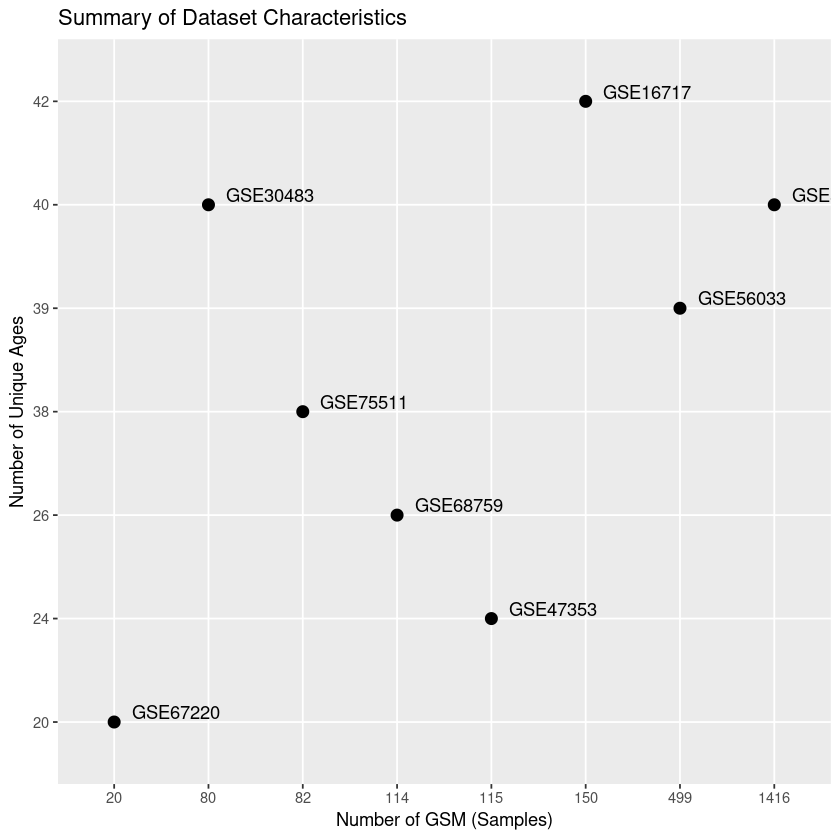

In [56]:
library(ggplot2)
library(dplyr)

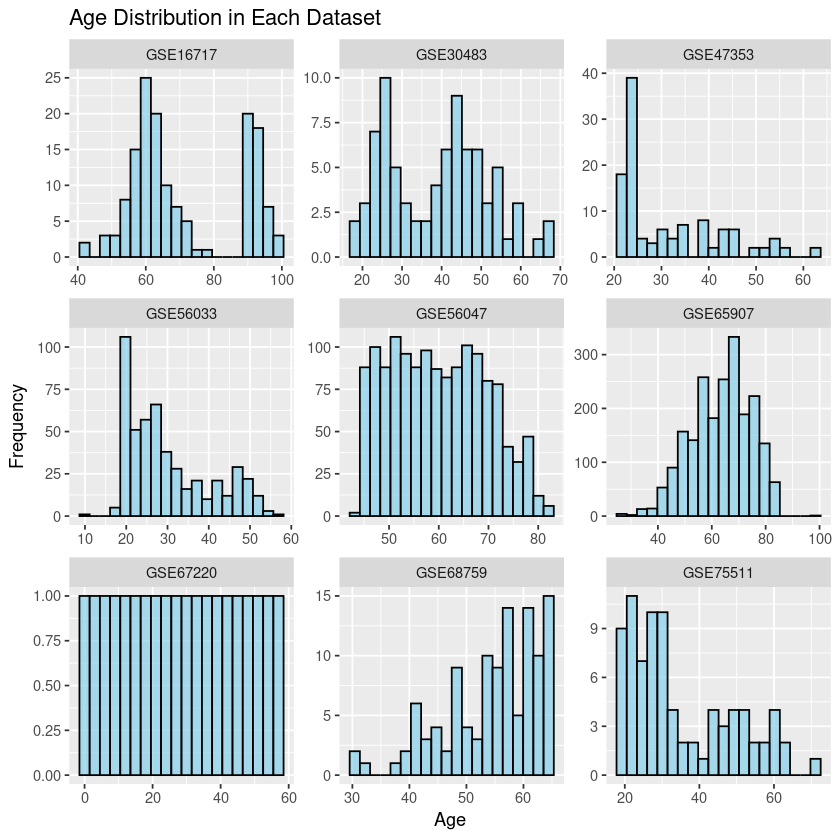

In [66]:
# Чтение данных из файла
data <- read.csv("merged_data_annotation_full.csv", header = TRUE)

# Группировка данных по GSE и вычисление диапазона возрастов
summary_data <- data %>%
  group_by(GSE) %>%
  summarise(
    num_samples = n_distinct(GSM),
    age_range = paste(min(age), "-", max(age))
  )

data <- data[data$age >= 0 & data$age <= 100, ]

ggplot(data, aes(x = age)) +
  geom_histogram(bins = 20, color = "black", fill = "skyblue", alpha = 0.7) +
  facet_wrap(~GSE, scales = "free") +
  labs(x = "Age", y = "Frequency", title = "Age Distribution in Each Dataset")

In [58]:
head(merged_data_annotation_full, 2)

GSE,num_samples,unique_ages
<chr>,<int>,<int>
GSE16717,150,42
GSE30483,80,40
